In [3]:
%matplotlib inline
from pathlib import Path

import re
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.metrics import r2_score


from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import StandardScaler

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from datetime import datetime

In [4]:
import numpy as np

In [5]:
data = pd.read_excel("USMassShootings.xlsx")

In [6]:
data.head(10)

,CASE,GENDER,SHOOTINGTYPE,RACE,LOCATION,STATE,DATE,YEAR,SUMMARY,FATALITIES,...,WEAPONSOBTAINEDLEGALLY,WHEREWEAPONOBTAINED,TYPEOFWEAPONS,NUMWEAPONS,ASSAULT,WEAPONDETAILS,SOURCES,MENTALHEALTHSOURCES,LATITUDE,LONGITUDE
0,Chattanooga military recruitment center,Male,Mass,Middle Eastern,"Chattanooga, Tennessee",Tennessee,7/16/2015,2015,"Kuwaiti-born Mohammod Youssuf Abdulazeez, 24, ...",5,...,Yes,"On the internet, via Armslist.com",2 assault rifles; semiautomatic handgun,3,Yes,"AK-47, AR-15, and 30-round magazines; 9mm handgun",http://www.reuters.com/article/2015/07/16/us-u...,NaN,35.047157,-85.311821
1,Charleston Church Shooting,Male,Mass,White,"Charleston, South Carolina",South Carolina,6/17/2015,2015,"Dylann Storm Roof, 21, shot and killed 9 peopl...",9,...,Yes,"Shooter's Choice gun store in West Columbia, S...",Handgun,1,No,".45-caliber Glock (model 41, with 13-round cap...",http://www.motherjones.com/politics/2015/06/dy...,NaN,32.788387,-79.933144
2,Marysville-Pilchuck High School shooting,Male,Mass,Native American,"Marysville, Washington",Washington,10/24/2014,2014,"Jaylen Fryberg, 15, using a .40-caliber Berret...",5,...,No,Gun was his father's.,Handgun,1,No,Beretta .40-caliber handgun,http://www.seattletimes.com/seattle-news/fourt...,http://www.newyorker.com/science/maria-konniko...,48.050823,-122.176918
3,Alturas tribal shooting,Female,Mass,Native American,"Alturas, California",California,2/20/2014,2014,"Cherie Lash Rhoades, 44, opened fire at the Ce...",4,...,NaN,Unknown,Two handguns and a butcher knife,2,No,9mm semi-automatic handgun,http://www.sacbee.com/news/local/crime/article...,NaN,41.487103,-120.542236
4,Washington Navy Yard shooting,Male,Mass,Black,"Washington, D.C.",D.C.,9/16/2013,2013,"Aaron Alexis, 34, a military veteran and contr...",12,...,Yes,Sharpshooters Small Arms Range,"Sawed-off shotgun, 2 boxes of shells; also a ....",1,No,Remington 870 Express 12-gauge shotgun; Berett...,http://www.nytimes.com/2013/09/18/us/state-law...,http://bigstory.ap.org/article/13-killed-washi...,38.874981,-76.994530
5,Hialeah apartment shooting,Male,Mass,Latino,"Hialeah, Florida",Florida,7/26/2013,2013,"Pedro Vargas, 42, set fire to his apartment, k...",7,...,Yes,Florida Gun Center,9mm semi-automatic handgun,1,No,Glock 17,http://www.miamiherald.com/2013/07/27/v-print/...,http://www.miamiherald.com/2013/08/03/v-print/...,25.867010,-80.291466
6,Santa Monica rampage,Male,Spree,White,"Santa Monica, California",California,6/7/2013,2013,"John Zawahri, 23, armed with a homemade assaul...",6,...,Yes,Assembled a rifle out of component parts.,"Assault rifle, high capacity magazines, antiqu...",2,Yes,".223-caliber semi-automatic assault rifle, abo...",http://www.cbsnews.com/8301-504083_162-5758932...,http://www.cbsnews.com/8301-504083_162-5758932...,34.008617,-118.494751
7,Pinewood Village Apartment shooting,Male,Mass,Black,"Federal Way, Washington",Washington,4/21/2013,2013,"Dennis Clark III, 27, shot and killed his girl...",5,...,Yes,Unknown,"Semiautomatic handgun, shotgun",2,No,".40 caliber semi-automatic handgun, pistol gri...",http://seattletimes.com/html/localnews/2020836...,NaN,47.312962,-122.339363
8,Mohawk Valley shootings,Male,Spree,White,"Herkimer County, New York",New York,3/13/2013,2013,"Kurt Myers, 64, shot six people in neighboring...",5,...,Yes,"Frank's Guns in Marcy, NY",Shotgun,1,No,Unknown,https://www.nyspnews.com/article_display.cfm?a...,http://poststar.com/news/local/state-and-regio...,43.045601,-74.984894
9,Newtown school shooting,Male,Mass,White,"Newtown, Connecticut",Connecticut,12/14/2012,2012,"Adam Lanza, 20, shot his mother dead at their ...",28,...,No,Stolen from mother,"Two semiautomatic handguns, one rifle (assault...",4,Yes,"10mm Glock, 9mm SIG Sauer P226 semiautomatic h...",http://usnews.nbcnews.com/_news/2012/12/14/159...,http://usnews.nbcnews.com/_news/2012/12/14/159...,41.412323,-73.311424


In [7]:
pd.set_option('display.max_columns', None)
data.head()

,CASE,GENDER,SHOOTINGTYPE,RACE,LOCATION,STATE,DATE,YEAR,SUMMARY,FATALITIES,WOUNDED,TOTALVICTIMS,LOCATIONTYPE,PRIORSIGNSOFMENTALILLNESS,MENTALHEALTHNOTES,WEAPONSOBTAINEDLEGALLY,WHEREWEAPONOBTAINED,TYPEOFWEAPONS,NUMWEAPONS,ASSAULT,WEAPONDETAILS,SOURCES,MENTALHEALTHSOURCES,LATITUDE,LONGITUDE
0,Chattanooga military recruitment center,Male,Mass,Middle Eastern,"Chattanooga, Tennessee",Tennessee,7/16/2015,2015,"Kuwaiti-born Mohammod Youssuf Abdulazeez, 24, ...",5,2,7,Military,Yes,"Abdulazeez ""had suffered for years from depres...",Yes,"On the internet, via Armslist.com",2 assault rifles; semiautomatic handgun,3,Yes,"AK-47, AR-15, and 30-round magazines; 9mm handgun",http://www.reuters.com/article/2015/07/16/us-u...,NaN,35.047157,-85.311821
1,Charleston Church Shooting,Male,Mass,White,"Charleston, South Carolina",South Carolina,6/17/2015,2015,"Dylann Storm Roof, 21, shot and killed 9 peopl...",9,1,10,Religious,No,NaN,Yes,"Shooter's Choice gun store in West Columbia, S...",Handgun,1,No,".45-caliber Glock (model 41, with 13-round cap...",http://www.motherjones.com/politics/2015/06/dy...,NaN,32.788387,-79.933144
2,Marysville-Pilchuck High School shooting,Male,Mass,Native American,"Marysville, Washington",Washington,10/24/2014,2014,"Jaylen Fryberg, 15, using a .40-caliber Berret...",5,1,6,School,No,"Fryberg was well-liked and allegedly happy, bu...",No,Gun was his father's.,Handgun,1,No,Beretta .40-caliber handgun,http://www.seattletimes.com/seattle-news/fourt...,http://www.newyorker.com/science/maria-konniko...,48.050823,-122.176918
3,Alturas tribal shooting,Female,Mass,Native American,"Alturas, California",California,2/20/2014,2014,"Cherie Lash Rhoades, 44, opened fire at the Ce...",4,2,6,Other,No,NaN,NaN,Unknown,Two handguns and a butcher knife,2,No,9mm semi-automatic handgun,http://www.sacbee.com/news/local/crime/article...,NaN,41.487103,-120.542236
4,Washington Navy Yard shooting,Male,Mass,Black,"Washington, D.C.",D.C.,9/16/2013,2013,"Aaron Alexis, 34, a military veteran and contr...",12,8,20,Military,Yes,Had told Rhode Island police the prior month t...,Yes,Sharpshooters Small Arms Range,"Sawed-off shotgun, 2 boxes of shells; also a ....",1,No,Remington 870 Express 12-gauge shotgun; Berett...,http://www.nytimes.com/2013/09/18/us/state-law...,http://bigstory.ap.org/article/13-killed-washi...,38.874981,-76.994530


In [8]:
data.drop('SUMMARY', inplace=True, axis=1)

In [9]:
data.drop('CASE', inplace=True, axis=1)

In [10]:
data.drop('LOCATION', inplace=True, axis=1)

In [11]:
data.drop('SOURCES', inplace=True, axis=1)

In [12]:
data.drop('WEAPONDETAILS', inplace=True, axis=1)

In [13]:
data.drop('TYPEOFWEAPONS', inplace=True, axis=1)

In [14]:
data.drop('MENTALHEALTHSOURCES', inplace=True, axis=1)

In [15]:
data.drop('MENTALHEALTHNOTES', inplace=True, axis=1)

In [16]:
data.drop('WHEREWEAPONOBTAINED', inplace=True, axis=1)


In [17]:
print(data['STATE'].value_counts())

California        11
Florida            6
Washington         6
Texas              5
New York           4
Colorado           3
Wisconsin          3
Connecticut        3
Kentucky           2
North Carolina     2
South Carolina     2
Illinois           2
Minnesota          2
Georgia            2
Iowa               1
Oklahoma           1
Massachusetts      1
Nebraska           1
Pennsylvania       1
Nevada             1
Hawaii             1
Tennessee          1
Missouri           1
Arkansas           1
Arizona            1
Ohio               1
Mississippi        1
Virginia           1
D.C.               1
Oregon             1
Utah               1
Michigan           1
Name: STATE, dtype: int64


In [18]:
data.drop('DATE', inplace=True, axis=1)

In [19]:
data

,GENDER,SHOOTINGTYPE,RACE,STATE,YEAR,FATALITIES,WOUNDED,TOTALVICTIMS,LOCATIONTYPE,PRIORSIGNSOFMENTALILLNESS,WEAPONSOBTAINEDLEGALLY,NUMWEAPONS,ASSAULT,LATITUDE,LONGITUDE
0,Male,Mass,Middle Eastern,Tennessee,2015,5,2,7,Military,Yes,Yes,3,Yes,35.047157,-85.311821
1,Male,Mass,White,South Carolina,2015,9,1,10,Religious,No,Yes,1,No,32.788387,-79.933144
2,Male,Mass,Native American,Washington,2014,5,1,6,School,No,No,1,No,48.050823,-122.176918
3,Female,Mass,Native American,California,2014,4,2,6,Other,No,NaN,2,No,41.487103,-120.542236
4,Male,Mass,Black,D.C.,2013,12,8,20,Military,Yes,Yes,1,No,38.874981,-76.994530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,Male,Spree,White,Florida,1987,6,14,20,Other,Yes,Yes,3,No,28.033188,-80.642967
67,Male,Mass,White,Oklahoma,1986,15,6,21,Workplace,Yes,Yes,3,No,35.667202,-97.429367
68,Male,Mass,White,California,1984,22,19,41,Other,Yes,Yes,3,Yes,32.552002,-117.043083
69,Male,Mass,White,Texas,1984,6,1,7,Other,Yes,No,1,No,32.780106,-96.800011


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   GENDER                     71 non-null     object 
 1   SHOOTINGTYPE               71 non-null     object 
 2   RACE                       71 non-null     object 
 3   STATE                      71 non-null     object 
 4   YEAR                       71 non-null     int64  
 5   FATALITIES                 71 non-null     int64  
 6   WOUNDED                    71 non-null     int64  
 7   TOTALVICTIMS               71 non-null     int64  
 8   LOCATIONTYPE               71 non-null     object 
 9   PRIORSIGNSOFMENTALILLNESS  71 non-null     object 
 10  WEAPONSOBTAINEDLEGALLY     69 non-null     object 
 11  NUMWEAPONS                 71 non-null     int64  
 12  ASSAULT                    71 non-null     object 
 13  LATITUDE                   71 non-null     float64
 

In [21]:
categorical_cols = ['GENDER', 'SHOOTINGTYPE', 'RACE', 'STATE','LOCATIONTYPE','PRIORSIGNSOFMENTALILLNESS','WEAPONSOBTAINEDLEGALLY', 'ASSAULT'] 

#import pandas as pd
data = pd.get_dummies(data, columns = categorical_cols)

In [22]:
data

,YEAR,FATALITIES,WOUNDED,TOTALVICTIMS,NUMWEAPONS,LATITUDE,LONGITUDE,GENDER_Female,GENDER_Male,SHOOTINGTYPE_Mass,SHOOTINGTYPE_Spree,RACE_Asian,RACE_Black,RACE_Latino,RACE_Middle Eastern,RACE_Native American,RACE_Other,RACE_White,STATE_Arizona,STATE_Arkansas,STATE_California,STATE_Colorado,STATE_Connecticut,STATE_D.C.,STATE_Florida,STATE_Georgia,STATE_Hawaii,STATE_Illinois,STATE_Iowa,STATE_Kentucky,STATE_Massachusetts,STATE_Michigan,STATE_Minnesota,STATE_Mississippi,STATE_Missouri,STATE_Nebraska,STATE_Nevada,STATE_New York,STATE_North Carolina,STATE_Ohio,STATE_Oklahoma,STATE_Oregon,STATE_Pennsylvania,STATE_South Carolina,STATE_Tennessee,STATE_Texas,STATE_Utah,STATE_Virginia,STATE_Washington,STATE_Wisconsin,LOCATIONTYPE_Military,LOCATIONTYPE_Other,LOCATIONTYPE_Religious,LOCATIONTYPE_School,LOCATIONTYPE_Workplace,PRIORSIGNSOFMENTALILLNESS_No,PRIORSIGNSOFMENTALILLNESS_Yes,WEAPONSOBTAINEDLEGALLY_No,WEAPONSOBTAINEDLEGALLY_Yes,ASSAULT_No,ASSAULT_Yes
0,2015,5,2,7,3,35.047157,-85.311821,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1
1,2015,9,1,10,1,32.788387,-79.933144,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0
2,2014,5,1,6,1,48.050823,-122.176918,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0
3,2014,4,2,6,2,41.487103,-120.542236,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,2013,12,8,20,1,38.874981,-76.994530,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,1987,6,14,20,3,28.033188,-80.642967,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0
67,1986,15,6,21,3,35.667202,-97.429367,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0
68,1984,22,19,41,3,32.552002,-117.043083,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1
69,1984,6,1,7,1,32.780106,-96.800011,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0


In [23]:
numeric_cols = ["YEAR", "FATALITIES", "WOUNDED", "TOTALVICTIMS", "NUMWEAPONS", "LATITUDE", "LONGITUDE"]

In [24]:
y=data[['NUMWEAPONS']]
X=data.drop(data.columns[[1]], axis=1)

In [25]:
print(y)

    NUMWEAPONS
0            3
1            1
2            1
3            2
4            1
..         ...
66           3
67           3
68           3
69           1
70           1

[71 rows x 1 columns]


In [26]:
print(X)

    YEAR  WOUNDED  TOTALVICTIMS  NUMWEAPONS   LATITUDE   LONGITUDE  \
0   2015        2             7           3  35.047157  -85.311821   
1   2015        1            10           1  32.788387  -79.933144   
2   2014        1             6           1  48.050823 -122.176918   
3   2014        2             6           2  41.487103 -120.542236   
4   2013        8            20           1  38.874981  -76.994530   
..   ...      ...           ...         ...        ...         ...   
66  1987       14            20           3  28.033188  -80.642967   
67  1986        6            21           3  35.667202  -97.429367   
68  1984       19            41           3  32.552002 -117.043083   
69  1984        1             7           1  32.780106  -96.800011   
70  1982        3            11           1  25.796492  -80.226685   

    GENDER_Female  GENDER_Male  SHOOTINGTYPE_Mass  SHOOTINGTYPE_Spree  \
0               0            1                  1                   0   
1            

# train test split

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X_train, y_train)  # perform linear regression
Y_pred = linear_regressor.predict(X_test)  # make predictions
#linear_regressor = LinearRegression()  # create object for the class
#linear_regressor.fit(X_train, y_train)  # perform linear regression
#Y_pred = linear_regressor.predict(X_test)  # make predictions

In [28]:
model = DecisionTreeRegressor(random_state=44)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [29]:
print(predictions)

[2. 3. 1. 1. 3. 1. 1. 1. 7. 4. 3. 4. 2. 1. 1. 2. 1. 1. 2. 2. 3. 3.]


In [30]:
print(y_test)

    NUMWEAPONS
22           2
0            3
49           1
4            1
55           3
18           1
10           1
33           1
46           9
12           4
31           3
9            4
61           2
5            1
53           1
30           2
59           1
35           1
58           2
42           2
16           3
34           3


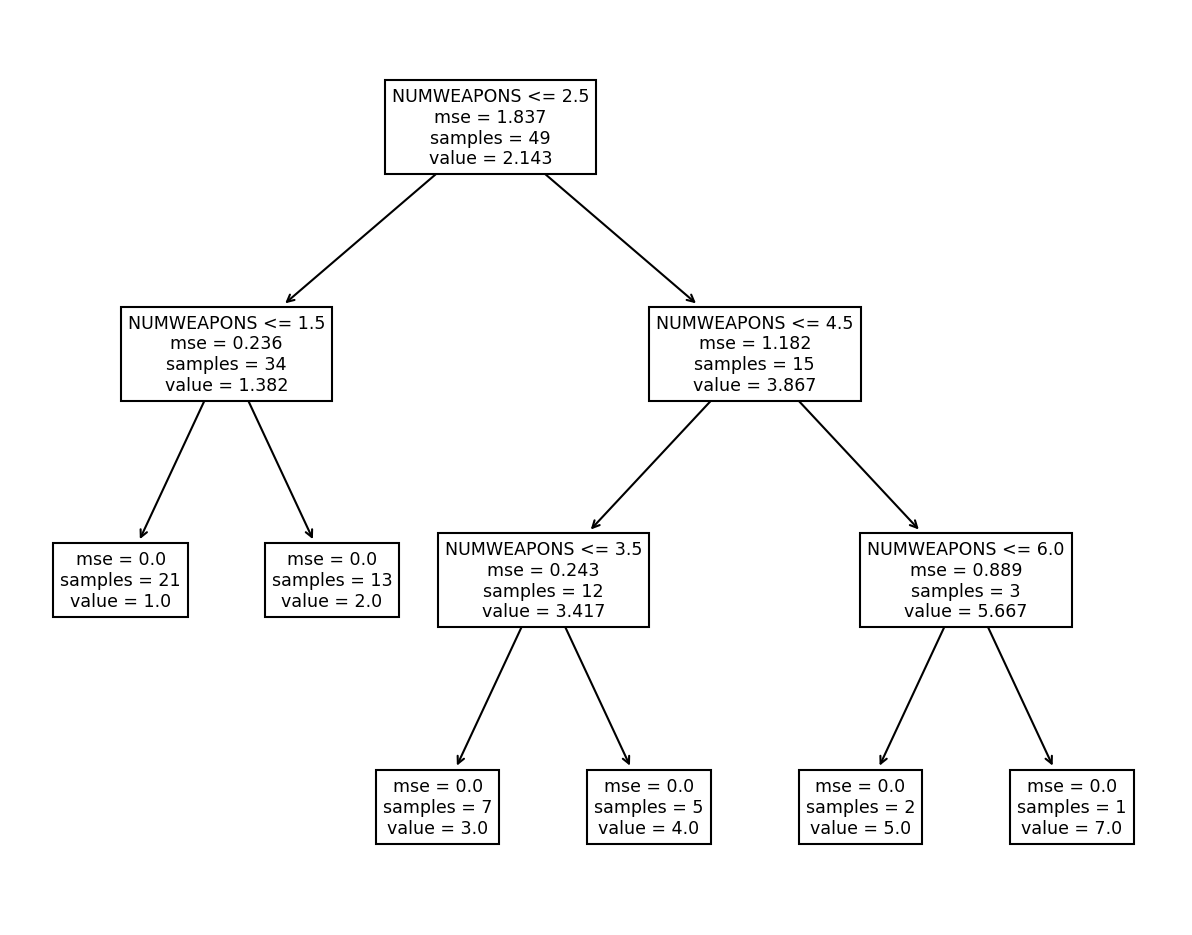

In [31]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8), dpi=150)
plot_tree(model, feature_names=X.columns);

In [32]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,Y_pred))
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,Y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,Y_pred)))
print("RMSLE",np.log(np.sqrt(mean_squared_error(y_test,Y_pred))))

MAE 8.952434753113763e-15
MSE 1.4169241685397294e-28
RMSE 1.190346238932072e-14
RMSLE -32.06194708002723


In [33]:
r2 = r2_score(y_test,Y_pred)
print(f"The R^2 value is: {r2}")

The R^2 value is: 1.0
